**MINI PROJECT 4 AIRPORT AND AIRLINES**

**PART II**

In [1]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Airports2.csv')
df1.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [7]:
df1['year'] = pd.to_datetime(df1['Fly_date']).dt.year
df1.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN,2008
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002,1990


**1) In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.**

In [11]:
df_2009 = df1[df1['year'] == 2009]
inbound_flights = df_2009.groupby('Destination_city')['Flights'].sum().sort_values(ascending=False)
top_10_inbound = inbound_flights.head(10)
rank = np.arange(1, len(top_10_inbound) + 1)
top_10_inbound_df = pd.DataFrame({'total_inbound_flights': top_10_inbound.values, 'rank': rank}, index=top_10_inbound.index)
print(tabulate(top_10_inbound_df, headers='keys', tablefmt='psql'))


+--------------------+-------------------------+--------+
| Destination_city   |   total_inbound_flights |   rank |
|--------------------+-------------------------+--------|
| Chicago, IL        |                  417297 |      1 |
| Atlanta, GA        |                  396603 |      2 |
| Dallas, TX         |                  316265 |      3 |
| New York, NY       |                  278206 |      4 |
| Houston, TX        |                  250030 |      5 |
| Washington, DC     |                  238744 |      6 |
| Charlotte, NC      |                  199700 |      7 |
| Los Angeles, CA    |                  192676 |      8 |
| Detroit, MI        |                  183655 |      9 |
| Philadelphia, PA   |                  181645 |     10 |
+--------------------+-------------------------+--------+


**2) In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.**

In [12]:
outbound_flights = df_2009.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
top_10_outbound = outbound_flights.head(10)
rank = np.arange(1, len(top_10_outbound) + 1)
top_10_outbound_df = pd.DataFrame({'total_outbound_flights': top_10_outbound.values, 'rank': rank}, index=top_10_outbound.index)
print(tabulate(top_10_outbound_df, headers='keys', tablefmt='psql'))

+------------------+--------------------------+--------+
| Origin_city      |   total_outbound_flights |   rank |
|------------------+--------------------------+--------|
| Chicago, IL      |                   416742 |      1 |
| Atlanta, GA      |                   397112 |      2 |
| Dallas, TX       |                   316739 |      3 |
| New York, NY     |                   278351 |      4 |
| Houston, TX      |                   249285 |      5 |
| Washington, DC   |                   238958 |      6 |
| Charlotte, NC    |                   200403 |      7 |
| Los Angeles, CA  |                   193248 |      8 |
| Detroit, MI      |                   184087 |      9 |
| Philadelphia, PA |                   181575 |     10 |
+------------------+--------------------------+--------+


**3) In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.**

In [27]:
df_1999_2009 = df1[(df1['year'] >= 1999) & (df1['year'] <= 2009)]
outbound_flights_1999_2009 = df_1999_2009.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
top_10_outbound_1999_2009 = outbound_flights_1999_2009.head(10)
rank = np.arange(1, len(top_10_outbound_1999_2009) + 1)
top_10_outbound_1999_2009_df = pd.DataFrame({'total_outbound_flights': top_10_outbound_1999_2009.values, 'rank': rank}, index=top_10_outbound_1999_2009.index)
top_10_outbound_1999_2009_df['total_outbound_flights'] = top_10_outbound_1999_2009_df['total_outbound_flights'].astype(int)
print(tabulate(top_10_outbound_1999_2009_df, headers='keys', tablefmt='psql'))

+-----------------+--------------------------+--------+
| Origin_city     |   total_outbound_flights |   rank |
|-----------------+--------------------------+--------|
| Chicago, IL     |              4.99732e+06 |      1 |
| Atlanta, GA     |              4.17748e+06 |      2 |
| Dallas, TX      |              3.93803e+06 |      3 |
| Houston, TX     |              2.75062e+06 |      4 |
| New York, NY    |              2.7504e+06  |      5 |
| Washington, DC  |              2.4321e+06  |      6 |
| Los Angeles, CA |              2.41216e+06 |      7 |
| Detroit, MI     |              2.21528e+06 |      8 |
| Minneapolis, MN |              2.08058e+06 |      9 |
| Phoenix, AZ     |              1.98395e+06 |     10 |
+-----------------+--------------------------+--------+


**4) In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Francisco, CA).**

In [28]:
df_1999_2009 = df1[(df1['year'] >= 1999) & (df1['year'] <= 2009)]
outbound_passengers_1999_2009 = df_1999_2009.groupby('Origin_city')['Passengers'].sum().sort_values(ascending=False)
top_10_outbound_passengers_1999_2009 = outbound_passengers_1999_2009.head(10)
rank = np.arange(1, len(top_10_outbound_passengers_1999_2009) + 1)
top_10_outbound_passengers_1999_2009_df = pd.DataFrame({'total_num_passengers': top_10_outbound_passengers_1999_2009.values, 'rank': rank}, index=top_10_outbound_passengers_1999_2009.index)
top_10_outbound_passengers_1999_2009_df = top_10_outbound_passengers_1999_2009_df.reset_index()

# Assuming 'Origin_city' contains city and state separated by a comma

top_10_outbound_passengers_1999_2009_df[['city', 'state']] = top_10_outbound_passengers_1999_2009_df['Origin_city'].str.split(',', expand=True)
top_10_outbound_passengers_1999_2009_df['city'] = top_10_outbound_passengers_1999_2009_df['city'].str.strip()
top_10_outbound_passengers_1999_2009_df['state'] = top_10_outbound_passengers_1999_2009_df['state'].str.strip()
top_10_outbound_passengers_1999_2009_df['city'] = top_10_outbound_passengers_1999_2009_df['city'] + ', ' + top_10_outbound_passengers_1999_2009_df['state']
top_10_outbound_passengers_1999_2009_df = top_10_outbound_passengers_1999_2009_df[['city', 'total_num_passengers', 'rank']]
print(tabulate(top_10_outbound_passengers_1999_2009_df, headers='keys', tablefmt='psql'))


+----+-----------------+------------------------+--------+
|    | city            |   total_num_passengers |   rank |
|----+-----------------+------------------------+--------|
|  0 | Chicago, IL     |              381908565 |      1 |
|  1 | Atlanta, GA     |              368972910 |      2 |
|  2 | Dallas, TX      |              294826498 |      3 |
|  3 | Los Angeles, CA |              223950429 |      4 |
|  4 | New York, NY    |              209454427 |      5 |
|  5 | Houston, TX     |              199031920 |      6 |
|  6 | Phoenix, AZ     |              186032113 |      7 |
|  7 | Las Vegas, NV   |              184877669 |      8 |
|  8 | Minneapolis, MN |              155881721 |      9 |
|  9 | Washington, DC  |              155604229 |     10 |
+----+-----------------+------------------------+--------+


**5) In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights.**

In [32]:
df_2007_2009 = df1[(df1['year'] == 2007) | (df1['year'] == 2009)]
outbound_passengers_2007_2009 = df_2007_2009.groupby('Origin_city')['Passengers'].sum().sort_values(ascending=False)
top_10_outbound_passengers_2007_2009 = outbound_passengers_2007_2009.head(10)
rank = np.arange(1, len(top_10_outbound_passengers_2007_2009) + 1)
top_10_outbound_passengers_2007_2009_df = pd.DataFrame({'total_num_passengers': top_10_outbound_passengers_2007_2009.values, 'rank': rank}, index=top_10_outbound_passengers_2007_2009.index)
top_10_outbound_passengers_2007_2009_df = top_10_outbound_passengers_2007_2009_df.reset_index()

# Assuming 'Origin_city' contains city and state separated by a comma
top_10_outbound_passengers_2007_2009_df[['city', 'state']] = top_10_outbound_passengers_2007_2009_df['Origin_city'].str.split(',', expand=True)
top_10_outbound_passengers_2007_2009_df['state'] = top_10_outbound_passengers_2007_2009_df['state'].str.strip()

# Group by state and sum passengers
state_level_passengers = df_2007_2009.groupby('Origin_city')['Passengers'].sum()
state_level_passengers = state_level_passengers.reset_index()
state_level_passengers[['city', 'state']] = state_level_passengers['Origin_city'].str.split(',', expand=True)
state_level_passengers['state'] = state_level_passengers['state'].str.strip()
state_level_total_passengers = state_level_passengers.groupby('state')['Passengers'].sum().sort_values(ascending=False)
top_10_state_level_total_passengers = state_level_total_passengers.head(10)
rank = np.arange(1, len(top_10_state_level_total_passengers) + 1)
top_10_state_level_total_passengers_df = pd.DataFrame({'total_num_passengers': top_10_state_level_total_passengers.values, 'rank': rank}, index=top_10_state_level_total_passengers.index)
top_10_state_level_total_passengers_df = top_10_state_level_total_passengers_df.reset_index()
top_10_state_level_total_passengers_df = top_10_state_level_total_passengers_df.rename(columns={"index": "state"})
print(tabulate(top_10_state_level_total_passengers_df, headers='keys', tablefmt='psql'))

+----+---------+------------------------+--------+
|    | state   |   total_num_passengers |   rank |
|----+---------+------------------------+--------|
|  0 | TX      |              118576093 |      1 |
|  1 | CA      |              118537406 |      2 |
|  2 | FL      |               93448010 |      3 |
|  3 | GA      |               71945184 |      4 |
|  4 | IL      |               71179367 |      5 |
|  5 | NY      |               56989265 |      6 |
|  6 | NC      |               43021560 |      7 |
|  7 | NV      |               40460714 |      8 |
|  8 | AZ      |               38935740 |      9 |
|  9 | PA      |               36806330 |     10 |
+----+---------+------------------------+--------+


**6) Merge the columns outputs in questions 1 and 2 from Part II**

In [34]:
merged_df = pd.merge(top_10_inbound_df, top_10_outbound_df, left_index=True, right_index=True, how='inner')
merged_df = merged_df.rename(columns={"rank_x": "inbound_rank", "rank_y": "outbound_rank"})
merged_df = merged_df.sort_values('inbound_rank', ascending=True)

print(tabulate(merged_df, headers='keys', tablefmt='psql'))

+------------------+-------------------------+----------------+--------------------------+-----------------+
|                  |   total_inbound_flights |   inbound_rank |   total_outbound_flights |   outbound_rank |
|------------------+-------------------------+----------------+--------------------------+-----------------|
| Chicago, IL      |                  417297 |              1 |                   416742 |               1 |
| Atlanta, GA      |                  396603 |              2 |                   397112 |               2 |
| Dallas, TX       |                  316265 |              3 |                   316739 |               3 |
| New York, NY     |                  278206 |              4 |                   278351 |               4 |
| Houston, TX      |                  250030 |              5 |                   249285 |               5 |
| Washington, DC   |                  238744 |              6 |                   238958 |               6 |
| Charlotte, NC    

**7) Plot group bar chart (see below image) with seaborn/matplotlib for the output in question 6 above, specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights.**

Plot for only top 10 cities by total_inbound_flights.
X-axis - city
Y-axis - total_outbound_flights, total_inbound_flights

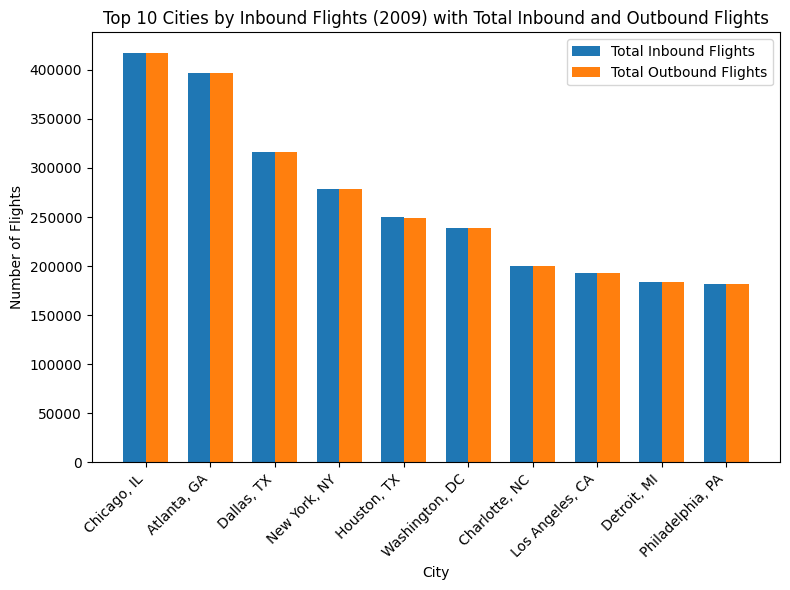

In [36]:
import matplotlib.pyplot as plt
top_10_cities = merged_df.sort_values('total_inbound_flights', ascending=False).head(10)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.35  # Width of the bars

ax.bar(top_10_cities.index, top_10_cities['total_inbound_flights'], width, label='Total Inbound Flights')
ax.bar(np.arange(len(top_10_cities.index)) + width, top_10_cities['total_outbound_flights'], width, label='Total Outbound Flights')
ax.set_xlabel('City')
ax.set_ylabel('Number of Flights')
ax.set_title('Top 10 Cities by Inbound Flights (2009) with Total Inbound and Outbound Flights')
ax.set_xticks(np.arange(len(top_10_cities.index)) + width / 2)
ax.set_xticklabels(top_10_cities.index, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()